In [54]:
import pandas as pd
import sklearn as sk
import plotly
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier

In [80]:
allstar_selections_data = pd.read_csv('All-Star Selections.csv')

In [81]:
allstar_selections_data

,player,team,lg,season,replaced
0,Bam Adebayo,Giannis,NBA,2023,False
1,Giannis Antetokounmpo,Giannis,NBA,2023,False
2,DeMar DeRozan,Giannis,NBA,2023,False
3,Kevin Durant,Giannis,NBA,2023,False
4,Shai Gilgeous-Alexander,Giannis,NBA,2023,False
...,...,...,...,...,...
1969,Alex Groza,West,NBA,1951,False
1970,George Mikan,West,NBA,1951,False
1971,Vern Mikkelsen,West,NBA,1951,False
1972,Jim Pollard,West,NBA,1951,False


In [82]:
allstar_2022 = allstar_selections_data[allstar_selections_data["season"] == 2022]

In [83]:
allstar_2022_list = allstar_2022["player"].tolist()

In [84]:
allstar_2023 = allstar_selections_data[allstar_selections_data["season"] == 2023]

In [85]:
allstar_2023_list = allstar_2023["player"].tolist()

In [86]:
player_per_game_data = pd.read_csv("Player Per Game.csv")

In [36]:
allstar_2022_player_data = player_per_game_data[player_per_game_data["season"] == 2022]
not_allstar_2022_player_data = allstar_2022_player_data.loc[~allstar_2022_player_data["player"].isin(allstar_2022_list)]
allstar_2022_player_data = allstar_2022_player_data.loc[allstar_2022_player_data["player"].isin(allstar_2022_list)]

In [61]:
allstar_2023_player_data = player_per_game_data[player_per_game_data["season"] == 2023]
not_allstar_2023_player_data = allstar_2023_player_data.loc[~allstar_2023_player_data["player"].isin(allstar_2023_list)]
allstar_2023_player_data = allstar_2023_player_data.loc[allstar_2023_player_data["player"].isin(allstar_2023_list)]
allstar_2023_player_data = allstar_2023_player_data[["season", "player", "pos", "pts_per_game", "ast_per_game", "trb_per_game"]]

In [21]:
allstar_2022_player_data = allstar_2022_player_data[["season", "player", "pos", "pts_per_game", "ast_per_game", "trb_per_game"]]

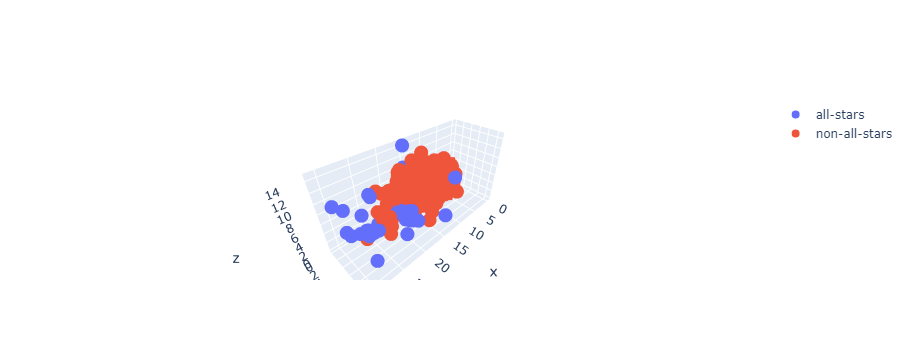

In [38]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=allstar_2022_player_data['pts_per_game'], y=allstar_2022_player_data['ast_per_game'], z=allstar_2022_player_data['trb_per_game'],
                                   mode='markers', text=allstar_2022_player_data['player'], name='all-stars'))
fig.add_trace(go.Scatter3d(x=not_allstar_2022_player_data['pts_per_game'], y=not_allstar_2022_player_data['ast_per_game'], z=not_allstar_2022_player_data['trb_per_game'],
                                   mode='markers', text=not_allstar_2022_player_data['player'], name='non-all-stars'))
fig.show()

In [170]:
tagged_2022_data = player_per_game_data[player_per_game_data["season"] == 2022]
tagged_2022_data = tagged_2022_data.drop_duplicates(subset=['player'], keep='first')
tagged_2022_data = tagged_2022_data[["season", "player", "pos", "pts_per_game", "ast_per_game", "trb_per_game"]]
tagged_2022_data['all-star'] = tagged_2022_data['player'].apply(lambda x: 1 if x in allstar_2022_list else 0)
tagged_2023_data = player_per_game_data[player_per_game_data["season"] == 2022]
tagged_2023_data = tagged_2023_data[["season", "player", "pos", "pts_per_game", "ast_per_game", "trb_per_game"]]
tagged_2023_data = tagged_2023_data.drop_duplicates(subset=['player'], keep='first')
tagged_2023_data['all-star'] = tagged_2023_data['player'].apply(lambda x: 1 if x in allstar_2023_list else 0)
x = tagged_2022_data['pts_per_game']
y = tagged_2022_data['ast_per_game']
z = tagged_2022_data['trb_per_game']
data = list(zip(x,y,z))
classes = tagged_2022_data['all-star']

In [171]:
knn = KNeighborsClassifier(n_neighbors=6)

In [172]:
knn.fit(data, classes)

KNeighborsClassifier(n_neighbors=6)

In [173]:
new_x = tagged_2023_data['pts_per_game'].tolist()
new_y = tagged_2023_data['ast_per_game'].tolist()
new_z = tagged_2023_data['trb_per_game'].tolist()
actual_allstars_2023 = tagged_2023_data['all-star'].tolist()
actual_allstars_names_2023 = tagged_2023_data['player'].tolist()
new_data = list(zip(new_x, new_y, new_z))
predictions_2023 = knn.predict(new_data)

In [174]:
print(len(predictions_2023) == len(actual_allstars_2023))

True


In [175]:
non_allstar_accuracy = [(actual_allstars_names_2023[i], predictions_2023[i]) for i in range(len(predictions_2023)) if (predictions_2023[i] == actual_allstars_2023[i]) and predictions_2023[i] == 0]

In [176]:
allstar_accuracy = [(actual_allstars_names_2023[i], predictions_2023[i]) for i in range(len(predictions_2023)) if (predictions_2023[i] == actual_allstars_2023[i]) and predictions_2023[i] == 1]

In [177]:
allstar_accuracy

[('DeMar DeRozan', 1),
 ('Donovan Mitchell', 1),
 ('Giannis Antetokounmpo', 1),
 ('Ja Morant', 1),
 ('Jayson Tatum', 1),
 ('Joel Embiid', 1),
 ('Kevin Durant', 1),
 ('Kyrie Irving', 1),
 ('LeBron James', 1),
 ('Luka Dončić', 1),
 ('Nikola Jokić', 1),
 ('Stephen Curry', 1)]

In [178]:
total_correct = len(allstar_accuracy)
print(total_correct)

12


In [179]:
print(len(allstar_2023_list))

27


In [180]:
print("Total Accuracy for all-stars", round(total_correct/len(allstar_2023_list), 2))

Total Accuracy for all-stars 0.44


In [181]:
all_all_stars_predicted = [(actual_allstars_names_2023[i], predictions_2023[i]) for i in range(len(predictions_2023)) if predictions_2023[i] == 1]

In [182]:
all_all_stars_predicted

[('Dejounte Murray', 1),
 ('DeMar DeRozan', 1),
 ('Devin Booker', 1),
 ('Donovan Mitchell', 1),
 ('Giannis Antetokounmpo', 1),
 ('Ja Morant', 1),
 ('James Harden', 1),
 ('Jayson Tatum', 1),
 ('Joel Embiid', 1),
 ('Kevin Durant', 1),
 ('Kyrie Irving', 1),
 ('LaMelo Ball', 1),
 ('LeBron James', 1),
 ('Luka Dončić', 1),
 ('Nikola Jokić', 1),
 ('Stephen Curry', 1),
 ('Trae Young', 1)]

In [183]:
len(all_all_stars_predicted)

17

In [184]:
non_allstar_accuracy

[('Aaron Gordon', 0),
 ('Aaron Henry', 0),
 ('Aaron Holiday', 0),
 ('Aaron Nesmith', 0),
 ('Aaron Wiggins', 0),
 ('Abdel Nader', 0),
 ('Ade Murkey', 0),
 ('Admiral Schofield', 0),
 ('Ahmad Caver', 0),
 ('Al Horford', 0),
 ('Alec Burks', 0),
 ('Aleem Ford', 0),
 ('Aleksej Pokusevski', 0),
 ('Alex Caruso', 0),
 ('Alex Len', 0),
 ('Alfonzo McKinnie', 0),
 ('Alize Johnson', 0),
 ('Alperen Şengün', 0),
 ('Amir Coffey', 0),
 ('Andre Drummond', 0),
 ('Andre Iguodala', 0),
 ('Andrew Wiggins', 0),
 ('Anfernee Simons', 0),
 ('Anthony Davis', 0),
 ('Anthony Gill', 0),
 ('Anthony Lamb', 0),
 ('Armoni Brooks', 0),
 ('Arnoldas Kulboka', 0),
 ('Austin Reaves', 0),
 ('Austin Rivers', 0),
 ('Avery Bradley', 0),
 ('Ayo Dosunmu', 0),
 ('B.J. Johnson', 0),
 ('Ben McLemore', 0),
 ('Bismack Biyombo', 0),
 ('Blake Griffin', 0),
 ('Boban Marjanović', 0),
 ('Bobby Portis', 0),
 ('Bogdan Bogdanović', 0),
 ('Bojan Bogdanović', 0),
 ('Bol Bol', 0),
 ('Bones Hyland', 0),
 ('Brad Wanamaker', 0),
 ('Bradley Beal', 0

In [187]:
tagged_2023_data[tagged_2023_data['player'] == 'Shai Gilgeous-Alexander']

,season,player,pos,pts_per_game,ast_per_game,trb_per_game,all-star
1369,2022,Shai Gilgeous-Alexander,PG,24.5,5.9,5.0,1
